In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
def get_err_and_order_of_convergence(alpha, h):
    dy = lambda t: alpha * np.pow(t, alpha - 1)
    y0 = 0
    y_exact = lambda t: np.pow(t, alpha)
    
    t_max = 10
    
    steps = int(t_max / h)
    t_vec = np.linspace(0, t_max, steps + 1)
    y_vec = np.zeros(steps + 1)
    y_vec[0] = y0
    for i in range(steps):
        y_vec[i + 1] = y_vec[i] + h * dy(t_vec[i])
    y_exact_vec = y_exact(t_vec)
    error_vec = np.abs(y_vec - y_exact_vec)
    r_vec = np.zeros(error_vec.size - 2)
    for i in range(1, steps):
        if error_vec[i - 1] == 0 or error_vec[i] == 0 or error_vec[i + 1] == 0:
            r_vec[i - 1] = np.nan
            continue
        denom = np.log(error_vec[i - 1] / error_vec[i])
        if denom == 0:
            r_vec[i - 1] = np.nan
            continue
        r_vec[i - 1] = np.log(error_vec[i] / error_vec[i + 1]) / denom
    return t_vec, error_vec, r_vec

ValueError: x, y, and format string must not be None

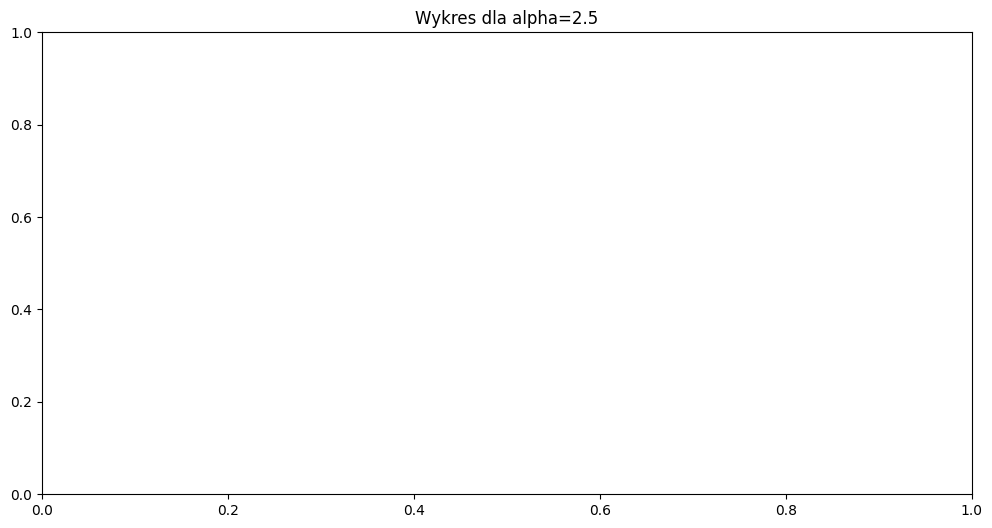

In [87]:
alpha_vec = [2.5, 1.5, 1.1]
h_vec = [0.2, 0.1, 0.05]

for alpha in alpha_vec:
    plt.figure(figsize=(12, 6))
    plt.title(f"Wykres dla alpha={alpha}")
    for h in h_vec:
        t_vec, error_vec, r_vec = get_err_and_order_of_convergence(alpha, h)
        plt.plot(t_vec.resize(error_vec.size), error_vec)
        plt.plot(t_vec.resize(r_vec.size), r_vec)
    plt.xlabel('k')
    plt.ylabel('Błąd bezwzględny')
    plt.legend()
    plt.grid(True)
    plt.show()
    

